In [58]:
"""
Notebook utilizado para apresentar uma breve introdução ao processamento de sinais.
Criado para a disciplina Geofísica I da Universidade Federal de Uberlândia.

Protegido por licença GPL v3.0. O uso e a reprodução são livres para fins educacionais.
desde que citada a fonte.

Prof. Dr. Emerson Rodrigo Almeida
Universidade Federal de Uberlândia
Instituto de Geografia - Curso de Geologia
emerson.almeida@ufu.br

Última modificação: 05/02/2021
"""

'\nNotebook utilizado para apresentar uma breve introdução ao processamento de sinais.\nCriado para a disciplina Geofísica I da Universidade Federal de Uberlândia.\n\nProtegido por licença GPL v3.0. O uso e a reprodução são livres para fins educacionais.\ndesde que citada a fonte.\n\nProf. Dr. Emerson Rodrigo Almeida\nUniversidade Federal de Uberlândia\nInstituto de Geografia - Curso de Geologia\nemerson.almeida@ufu.br\n\nÚltima modificação: 05/02/2021\n'

# Instruções iniciais

Neste notebook você irá aprender como a digitalização de um sinal analógico é feita corretamente a partir dos intervalos de amostragem. Para isto leia atentamente as instruções apresentadas antes de cada célula e execute-as uma a uma, para acompanhar o processo corretamente.

Não se preocupe em compreender o código em si, não é obrigatório que você conheça a programação para obter e interpretar os resultados da demonstração. Mesmo assim, sinta-se livre caso queira perguntar qualquer coisa para aprender mais sobre o código e sua elaboração.

<p>&nbsp;</p>

### Passo 01 - Preparação

Primeiramente vamos preparar o notebook com os módulos e funções que precisaremos no decorrer da demonstração. A célula abaixo contém as funções utilizadas nos cálculos e as funções utilizadas para gerar as figuras. Execute-a uma vez antes de executar qualquer outra parte do código e **não altere nada no código apresentado na célula** para não criar problemas na execução do código.

Você pode executar o código na célula clicando sobre ela e em seguida clicando no botão **RUN** na barra do Jupyter Notebook ou pressionando as teclas **SHIFT+ENTER** no seu teclado.

<p>&nbsp;</p>

**Importante!** Nem todas as células irão retornar algum tipo de mensagem ou figura após a execução. Isto é normal e não significa que a execução tenha falhado. Perceba o símbolo **In [   ]:** próximo ao canto superior esquerdo de cada célula. Ao iniciar a execução de uma delas você verá um asterisco ($*$) aparecer dentro dos colchetes. Você saberá que a execução ocorreu sem problemas quando o $*$ dentro dos colchetes for substituído por um número e nenhuma mensagem de erro aparecer abaixo da célula executada. 

In [68]:
from scipy.interpolate import interp1d
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


class sinal_monofreq():
    
    """
    Sinal composto por uma única frequência e caracterizado por uma função cosseno na forma 
    y(t) = A * cos(2 * pi * F * t)
    """
    
    def __init__(self, a, f, tw):
        self.amplitude = a
        self.frequencia = f
        self.janela_tempo = tw
        self.dt = tw/1000
        
        # eixo de tempo estendido, apenas para evitar artefatos nas extremidades das interpolações
        self.tt_analogico = np.arange(-self.janela_tempo, (2*self.janela_tempo) + self.dt, self.dt)
        
        # Função de referência que caracteriza o sinal analógico na forma y(t) = A * cos(2 * pi * F * t).
        # Pode ser amostrada em qualquer instante de tempo que se queira, de forma que esta é a melhor
        # forma de representar um sinal contínuo para os objetivos desta demonstração.
        self.funcao_cos = interp1d(self.tt_analogico, self.amplitude * \
                                   np.cos(2*np.pi*self.frequencia*self.tt_analogico), kind='linear')      
        
        # Gera uma aproximação do sinal analógico calculando as amplitudes da função cosseno com inervalo
        # de amostragem curto o suficiente para que ela possa ser visualizada como um sinal analógico contínuo.
        self.analogico = self.funcao_cos(self.tt_analogico)
        
        # Inicializa com valores nulos pois não foi feita a amostragem ainda
        self.dt_amostrado = None
        self.tt_amostrado = None
        self.amostrado = None
        
        # O sinal recuperado usa o mesmo dt do sinal analógico original, mas aqui inicializa com valor nulo.
        self.recuperado = None
        self.tt_recuperado = None

   
    def amostragem(self, novo_dt):
        """
        Faz a amostragem do sinal calculando as amplitudes da função cosseno de acordo com o intervalo
        de amostragem definido.
        """
        
        t_min = self.tt_analogico[0]
        t_max = self.tt_analogico[-1]
        self.dt_amostrado = novo_dt
        self.tt_amostrado = np.arange(t_min, t_max, self.dt_amostrado)

        # amostragem das amplitudes do sinal analógico
        self.amostrado = self.funcao_cos(self.tt_amostrado)      


    def recupera(self):
        """
        Interpola as amplitudes que foram amostradas da função cosseno para demonstrar como seria o
        comportamento real do sinal recuperado a partir destas amostras.
        """
        
        t_max = np.max(self.tt_amostrado)
        tt_aux = np.arange(-t_max, (2*t_max) + self.dt, self.dt)
        i1 = np.abs(tt_aux - self.tt_analogico[0]).argmin()
        i2 = np.abs(tt_aux - self.tt_analogico[-1]).argmin()
        self.tt_recuperado = tt_aux[i1+1:i2]
        
        funcao_recuperado = interp1d(self.tt_amostrado, self.amostrado, kind='cubic')
        self.recuperado = funcao_recuperado(self.tt_recuperado)
        
        
    
    
    
    
    
    
    
    
# funções de figuras

def plota_amostragem(sinal, n_fig='X'):
    """
    Plota as amplitudes amostradas em relação ao sinal analógico original
    """
        
    fig, ax = plt.subplots(figsize=(15,3))
    ax.plot(sinal.tt_analogico, sinal.analogico, '-r', label='Sinal original')
    ax.plot(sinal.tt_amostrado, sinal.amostrado, 'ob', label='Amplitudes amostradas')
    ax.set_xlabel("Tempo (s)", fontsize=14)
    ax.set_ylabel("Amplitude (ua)", fontsize=14)
    ax.set_title("Figura " + n_fig + ". Sinal amostrado a uma frequência de " + \
                 str(1/sinal.dt_amostrado) + " amostras por segundo", fontsize=14)
    ax.set_xlim([0, np.max(sinal.tt_amostrado)])
    ax.grid()
    ax.legend(loc='lower right', fontsize=12)

    
def plota_analogico(sinal, n_fig='X'):
    """
    Plota a função cosseno calculada a intervalos de tempo pequenos o suficiente para que se possa 
    fazer uma representação do sinal analógico original.
    """
    
    fig, ax = plt.subplots(figsize=(15,3))
    ax.plot(sinal.tt_analogico, sinal.analogico)
    ax.set_xlabel("Tempo (s)", fontsize=14)
    ax.set_ylabel("Amplitude (ua)", fontsize=14)
    ax.set_title("Figura " + n_fig + ". Representação do sinal analógico original", fontsize=14)
    ax.set_xlim([0, np.max(sinal.tt_analogico)])
    ax.grid()
    
    
def plota_representacao(tt_am, s_am, tt_rec, s_rec, t_w, titulo):
    """
    Plota a interpolação do sinal feita a partir das amostras obtidas do sinal analógico.
    """
    
    fig, ax = plt.subplots(figsize=(15,3))
    ax.plot(tt_rec, s_rec, '--b', label='Sinal recuperado', linewidth=1)
    ax.plot(tt_am, s_am, 'ob', label='Amplitudes amostradas')
    ax.set_xlabel("Tempo (s)", fontsize=14)
    ax.set_ylabel("Amplitude (ua)", fontsize=14)
    ax.set_title(titulo, fontsize=14)
    ax.set_xlim([0, t_w])
    ax.grid()
    ax.legend(loc='lower right', fontsize=12)
    
    
def plota_comparacao(tt1, s1, tt2, s2, t_w, titulo):
    """
    Plota a interpolação do sinal feita a partir das amostras obtidas do sinal analógico e a sobrepõe à 
    representação do sinal analógico original.
    """
    
    fig, ax = plt.subplots(figsize=(15,3))
    ax.plot(tt1, s1, '-r', label='Sinal original')
    ax.plot(tt2, s2, '--b', label='Sinal recuperado')
    ax.set_xlabel("Tempo (s)", fontsize=14)
    ax.set_ylabel("Amplitude (ua)", fontsize=14)
    ax.set_title(titulo, fontsize=14)
    ax.set_xlim([0, t_w])
    ax.grid()
    ax.legend(loc='lower right', fontsize=12)

### Passo 2 - Características do sinal analógico

Aqui iremos configurar as características que queremos no nosso sinal analógico. Nosso sinal analógico será caracterizado por uma função cosseno de amplitude *A*, dada em unidades de amplitude (ua) e uma única frequência *F*, dada em Hertz (Hz). Vamos começar com a amplitude de 1.0 ua e a frequência de 1.0 Hz. Este sinal será representado dentro de um intervalo finito de tempo, que iremos chamar de *janela de tempo* ou *janela temporal*, dada em segundos (s). Nossa janela temporal será inicialmente 20.0 s.

Execute a célula abaixo para estabelecer as configurações dos parâmetros do sinal analógico. Não altere nada por enquanto.

In [69]:
amplitude = 1.0                  # amplitude do sinal em unidades de amplitude
frequencia = 1.0                 # frequência em Hertz
janela_tempo = 10.0              # janela temporal em segundos

Agora vamos gerar o sinal analógico propriamente dito. Entretanto, temos uma limitação aqui. O computador trabalha apenas com informações discretas, i.e., é preciso ter valores específicos de tempo e amplitude para plotar corretamente a figura, e isto por si só já caracteriza uma espécie de digitalização. Iremos contornar esta limitação criando nosso sinal analógico a partir de uma função cosseno definida matematicamente. Isto permite que possamos obter valores de amplitude em qualquer instante de tempo que queiramos, já que a função cosseno é uma função contínua. 

Execute a célula abaixo para obter a expressão matemática que representará nosso sinal analógico.

In [70]:
meu_sinal = sinal_monofreq(amplitude, frequencia, janela_tempo)

Está achando tudo muito abstrato até aqui? Não se desespere, pois agora vamos gerar uma representação visual do sinal analógico. O que fazemos aqui é avaliar a nossa função cosseno em pontos que estão tão próximos entre si que podem ser interpolados sem prejuízo para a representação da sua continuidade.

Execute a célula abaixo para visualizar o sinal analógico.

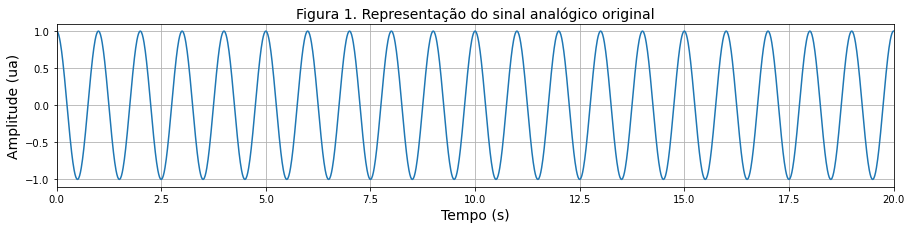

In [71]:
plota_analogico(meu_sinal, n_fig='1')

**Perguntas:** Este sinal corresponde ao que você esperava? As características de amplitude e frequência estão de acordo com os parâmetros configurados? Qual o período (em segundos) deste sinal?

### Passo 03 - Amostragem

Quando amostramos um sinal analógico estamos na verdade registrando a amplitude deste sinal em instantes de tempo específicos. Pense em um pêndulo oscilando. A distância entre a massa do pêndulo em relação ao seu ponto de repouso, i.e., a posição em que o pêndulo permanece quando não há oscilação, pode ser compreendida como a amplitude do nosso sinal. Quando o pêndulo está em oscilação nossos olhos observam um movimento contínuo e suave. Obter uma amostra do movimento do pêndulo equivale a bater uma foto sua. Será uma representação da amplitude do movimento em um instante de tempo específico. Assim, se batermos fotos em diferentes instantes de tempo e agruparmos todas em sequência teremos uma amostragem do movimento do pêndulo. Sistemas dedicados podem então reproduzir o movimento do pêndulo de forma fiel.

No entanto, a amostragem não pode ser feita de qualquer maneira. Se ela não for feita adequadamente, o sinal - ou o movimento do pêndulo - não será representado com fidelidade. Primeiramente, é necessário que as amostras sejam coletadas em instantes de tempo separados entre si por intervalos de tempo ($\Delta t$) regulares. Em seguida, deve-se obedecer ao critério estabelecido pela **Teoria da amostragem de Shannon**, que estabelece que a frequência de amostragem ($f_{am}$) deve ser maior ou igual a duas vezes a frequência ($f$) a ser amostrada, i.e.,:

$$f_{am} \geq 2*f$$

A frequência de amostragem correponde ao número de amostras obtidas por unidade de tempo. O intervalo de tempo entre cada amostra é então dado pelo intervalo de amostragem ($\Delta t_{am}$), que é o inverso da frequência de amostragem:

$$\Delta t_{am} = \frac{1}{f_{am}}$$


Assim, pelo Teorema da Amostragem, temos a definição do critério para garantir a amostragem correta do sinal:

$$\Delta t_{am} = \frac{1}{f_{am}} = \frac{1}{2 * f}$$

Vamos então definir esta frequência de amostragem para nosso sinal executando a célula abaixo:

In [76]:
f_am = 4 * frequencia          # frequência de amostragem

e, em seguida, executando a célula abaixo para visualizar as amplitudes que foram amostradas (pontos azuis) no nosso sinal analógico (linha vermelha):

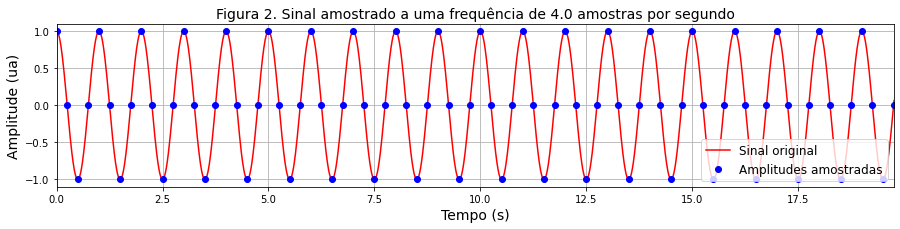

In [77]:
meu_sinal.amostragem(novo_dt=1/f_am)
plota_amostragem(meu_sinal, n_fig='2')

**Pergunta:** Qual o intervalo de amostragem utilizado?

### Passo 04 - Recuperação do sinal

Quando o sinal é amostrado corretamente é possível recuperá-lo através de sistemas dedicados, que fogem ao escopo desta demonstração. Aqui exemplificaremos a recuperação do sinal através de uma simples interpolação.

Quando registramos as amostras de um sinal, as informações sobre a amplitude do sinal e sobre os intantes de tempo em que estas amplitudes foram medidas são tudo o que temos para trabalhar. Não há informação alguma sobre o comportamento do sinal, que pode ser uma função cosseno, uma função seno, uma sobreposição de ambas, ou qualquer outra coisa. Desta forma, vamos pegar as amostras que visualizamos na Figura 2 e interpolar um novo sinal a partir delas executando a célula abaixo:

In [ ]:
sinal_rec, t_rec = recupera_sinal(t_amostrado, sinal_amostrado)
plota_representacao(t_amostrado, sinal_amostrado, t_rec, sinal_rec, janela_tempo, "Figura 3. Sinal recuperado da amostragem")

Assim como um software de análise de dados geofísicos não tem ideia sobre o comportamento do sinal verdadeiro, não há qulquer informação pré-determinada sobre as características do sinal original na interpolação realizada nesta demonstração. Perceba que, ainda assim, é possível recuperar um sinal com as características de uma função cosseno. Mas será que o sinal recuperado é fiel ao sinal original?

Execute a célula abaixo para visualizar uma compraração entre o sinal recuperado (em azul) e o sinal original (em vermelho).

In [ ]:
plota_comparacao(t_analogico, sinal_analogico, t_rec, sinal_rec, janela_tempo, \
                 "Figura 4. Comparação entre o sinal original e o sinal recuperado da amostragem")

**Pergunta:** Você considera que a recuperação foi bem feita? Qual a frequência do sinal original? Qual a frequência do sinal recuperado? 

# Exercícios

**1 -** Volte à célula em que você definiu as características do sinal analógico, no início doo Passo 02. Modifique os parâmetros de amplitude e frequência do sinal e verifique qual é o intervalo de amostragem ideal para representar o sinal. Defina os intervalos de amostragem para sinais de 2 Hz, 0.5 Hz, 14 kHz. Ajuste a janela temporal conforme necessário para visualizar corretamente o sinal.

**2 -** Volte agora à primeira célula do Passo 03 e Modifique a frequência de amostragem alterando o número correspondente ao fator que multiplica a frequência do sinal. Utilizando um sinal de frequência 14 kHz verifique como a frequência de amostragem afeta o sinal recuperado. O que acontece quando você utiliza uma frequência de amostragem igual à frequência do sinal? E quando a frequência de amostragem é igual a 3/4 da frequência do sinal? E quando a frequência de amostragem é igual a 4 vezes a frequência do sinal?

**Observações: a)** Modifique apenas os números. Não modifique os nomes das variáveis, ou o código poderá haver problemas na execução do código. **b)** Utilize números com ponto decimal. **c)** Após modificar os parâmetros do sinal analógico na célula correspondente será necessário executá-la e executar as células seguintes novamente, uma a uma e em ordem, para que as figuras sejam geradas corretamente. **d)** Caso tenha qualquer problema com a execução do código experimente clicar em "Kernel > Restart & Clear Output" na barra acima. Se o problema persistir entre em contato comigo reportando o problema em detalhes.